## reading data 

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\mohamed\Downloads\data (2).csv")

In [3]:
data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
...,...,...,...,...,...,...,...,...,...
128056,27.0,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128057,19.0,Male,0,3.00078,2.525392,4.71081,3.657814,Unknown,INFP
128058,26.0,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP
128059,24.0,Male,0,9.37782,5.077443,1.79598,6.762643,Unknown,ENFJ


## understanding the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [5]:
data.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


## check nulls

In [6]:
data.isna().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

## check duplicated

In [7]:
data.duplicated().sum()

0

## check outlayers

In [8]:
for i in data.columns:
    if(data[i].dtype in ["float64","int64"]):
        print(i)
        print(data[i].describe())

Age
count    128061.000000
mean         26.349091
std           4.908022
min          18.000000
25%          23.000000
50%          25.000000
75%          29.000000
max          57.000000
Name: Age, dtype: float64
Education
count    128061.000000
mean          0.411156
std           0.492045
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Education, dtype: float64
Introversion Score
count    128061.000000
mean          4.996387
std           2.888636
min           0.000040
25%           2.490710
50%           4.993640
75%           7.500170
max           9.999990
Name: Introversion Score, dtype: float64
Sensing Score
count    128061.000000
mean          5.081893
std           1.183236
min           0.000000
25%           4.315659
50%           5.124169
75%           5.892288
max           9.788815
Name: Sensing Score, dtype: float64
Thinking Score
count    128061.000000
mean          4.988040
std           2.88601

In [9]:
import matplotlib.pyplot as plt

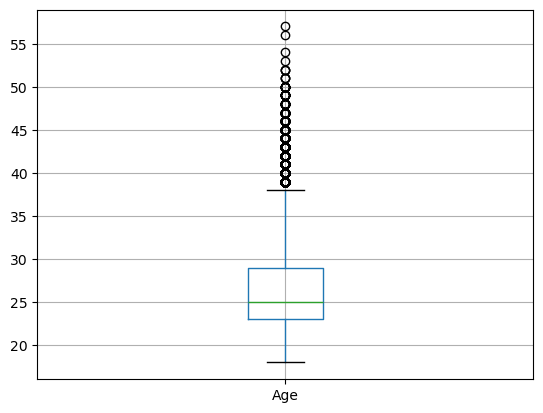

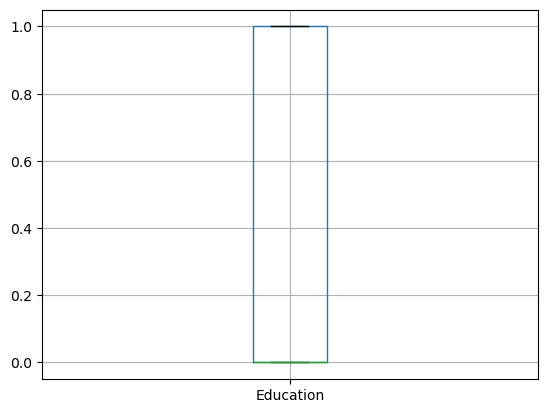

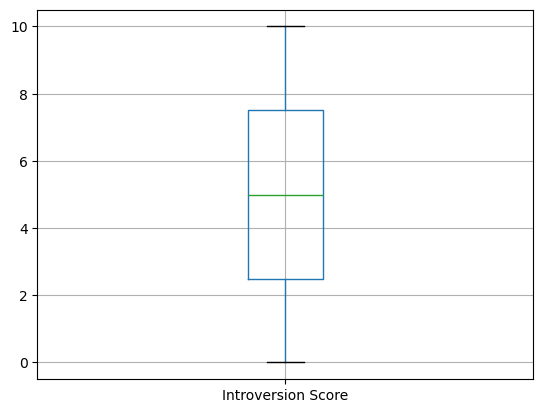

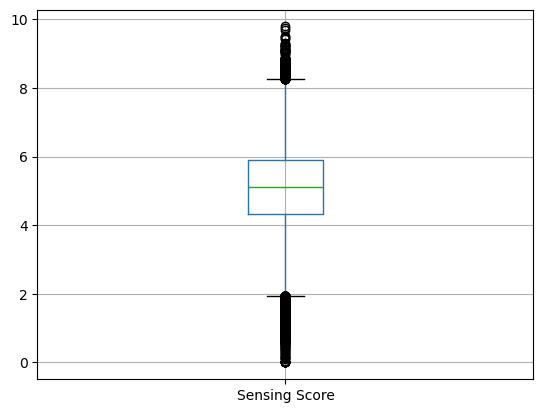

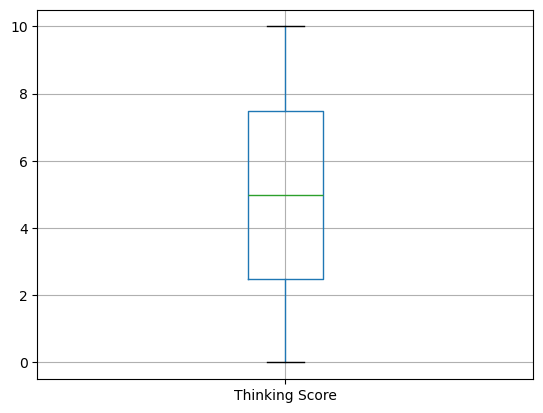

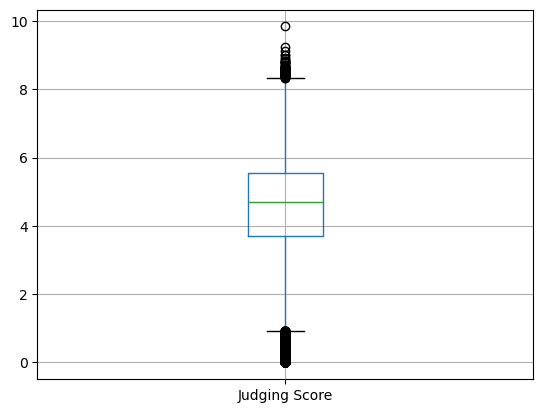

In [10]:
for i in data.columns:
    if(data[i].dtype in ["float64","int64"]):
        data.boxplot(column=i)
        plt.show()

In [11]:
Q1=data["Age"].quantile(0.25)
Q3=data["Age"].quantile(.75)
iqr=Q3-Q1
max=Q3+(iqr*1.5)
min=Q1-(iqr*1.5)
print(f"max is :{max}")
print(f"min is {min}")
outlayers=data[data["Age"]>max]
data=data[data["Age"]<=max]
print(f"shape of outlayers{outlayers.shape}")
print(f"shape of data {data.shape}")

max is :38.0
min is 14.0
shape of outlayers(2692, 9)
shape of data (125369, 9)


## take sample from outlayer age because its real data

In [12]:
out1=outlayers.sample(frac=0.2)

In [13]:
Q1=data["Sensing Score"].quantile(0.25)
Q3=data["Sensing Score"].quantile(.75)
iqr=Q3-Q1
max=Q3+(iqr*1.5)
min=Q1-(iqr*1.5)
print(f"max is :{max}")
print(f"min is {min}")
outlayers=data[(data["Sensing Score"]>max)  | (data["Sensing Score"]<min)]
data=data[(data["Sensing Score"]<=max) & (data["Sensing Score"]>=min)]
print(f"shape of outlayers{outlayers.shape}")
print(f"shape of data {data.shape}")

max is :8.258689874166985
min is 1.9506565396523414
shape of outlayers(1138, 9)
shape of data (124231, 9)


In [14]:
Q1=data["Judging Score"].quantile(0.25)
Q3=data["Judging Score"].quantile(.75)
iqr=Q3-Q1
max=Q3+(iqr*1.5)
min=Q1-(iqr*1.5)
print(f"max is :{max}")
print(f"min is {min}")
outlayers=data[(data["Judging Score"]>max)  | (data["Judging Score"]<min)]
data=data[(data["Judging Score"]<=max) & (data["Judging Score"]>=min)]
print(f"shape of outlayers{outlayers.shape}")
print(f"shape of data {data.shape}")

max is :8.337796083496888
min is 0.9319868809789775
shape of outlayers(1463, 9)
shape of data (122768, 9)


In [15]:
data=pd.concat([data,out1])
data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
...,...,...,...,...,...,...,...,...,...
124759,39.0,Female,1,4.08116,6.085769,7.90641,6.929016,Arts,ENTP
63355,47.0,Female,0,9.48708,5.204563,0.61035,6.434882,Arts,ENFJ
111865,41.0,Female,1,0.59925,7.044434,2.24993,4.529773,Others,ISFP
38014,39.0,Male,0,0.36245,4.860383,5.97460,2.204471,Unknown,INFP


## check len of unique category of data

In [16]:
len(data["Gender"].unique())

2

In [17]:
len(data["Interest"].unique())

5

In [18]:
len(data["Personality"].unique())

16

## check balance of Gender

In [19]:
data["Gender"].value_counts()

Gender
Male      67852
Female    55454
Name: count, dtype: int64

In [20]:
#balanced

## check balance of Interest 

In [21]:
data["Interest"].value_counts()

Interest
Unknown       47028
Arts          24586
Others        20902
Technology    18354
Sports        12436
Name: count, dtype: int64

In [22]:
data["Interest"]=data["Interest"].apply(lambda x:x if x in ["Arts","Technology","Sports"] else None)

In [23]:
data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,None,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,None,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,None,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
...,...,...,...,...,...,...,...,...,...
124759,39.0,Female,1,4.08116,6.085769,7.90641,6.929016,Arts,ENTP
63355,47.0,Female,0,9.48708,5.204563,0.61035,6.434882,Arts,ENFJ
111865,41.0,Female,1,0.59925,7.044434,2.24993,4.529773,None,ISFP
38014,39.0,Male,0,0.36245,4.860383,5.97460,2.204471,None,INFP


In [24]:
data.dropna(inplace=True)

In [25]:
data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP
7,27.0,Female,0,5.24958,5.963290,1.16176,5.873350,Sports,ENFJ
9,24.0,Female,0,1.62636,5.160906,7.25476,3.825849,Technology,INTP
11,29.0,Female,1,7.69101,4.198218,9.22787,6.078683,Arts,ENTP
...,...,...,...,...,...,...,...,...,...
110671,39.0,Male,0,5.29331,5.519455,8.56298,5.561729,Technology,ENTP
36667,41.0,Male,1,7.52233,4.737260,2.20222,3.354986,Arts,ENFP
124759,39.0,Female,1,4.08116,6.085769,7.90641,6.929016,Arts,ENTP
63355,47.0,Female,0,9.48708,5.204563,0.61035,6.434882,Arts,ENFJ


In [26]:
data["Interest"].value_counts()

Interest
Arts          24586
Technology    18354
Sports        12436
Name: count, dtype: int64

In [27]:
## not balanced

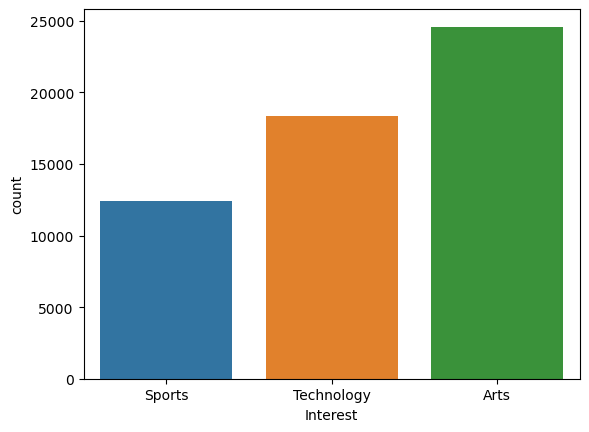

In [28]:
import seaborn as sns
sns.countplot(x="Interest",data=data)
plt.show()

## use oversambling to balance Interest

In [29]:
x=data.drop("Interest",inplace=False,axis=1)
y=data["Interest"]
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(x, y)
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
print(balanced_data["Interest"].value_counts())

Interest
Sports        24586
Technology    24586
Arts          24586
Name: count, dtype: int64


In [30]:
#balanced

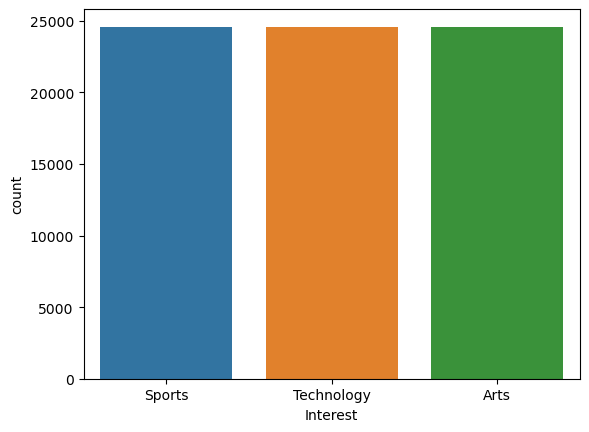

In [31]:
import seaborn as sns
sns.countplot(x="Interest",data=balanced_data)
plt.show()

In [32]:
balanced_data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest
0,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,ESFP,Sports
1,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,ENFP,Technology
2,27.0,Female,0,5.24958,5.963290,1.16176,5.873350,ENFJ,Sports
3,24.0,Female,0,1.62636,5.160906,7.25476,3.825849,INTP,Technology
4,29.0,Female,1,7.69101,4.198218,9.22787,6.078683,ENTP,Arts
...,...,...,...,...,...,...,...,...,...
73753,22.0,Female,0,8.79111,3.947536,8.04290,2.557161,ENTP,Technology
73754,26.0,Male,0,7.99258,4.753376,3.50704,4.339341,ENFP,Technology
73755,23.0,Female,1,7.68756,6.218204,5.61882,4.549770,ESTP,Technology
73756,23.0,Male,1,6.23134,4.609098,9.33312,2.417745,ENTP,Technology


## encoding (Gender) by label encoder

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
balanced_data['Gender_encoded'] = label_encoder.fit_transform(balanced_data['Gender'])

In [34]:
balanced_data

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest,Gender_encoded
0,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,ESFP,Sports,0
1,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,ENFP,Technology,0
2,27.0,Female,0,5.24958,5.963290,1.16176,5.873350,ENFJ,Sports,0
3,24.0,Female,0,1.62636,5.160906,7.25476,3.825849,INTP,Technology,0
4,29.0,Female,1,7.69101,4.198218,9.22787,6.078683,ENTP,Arts,0
...,...,...,...,...,...,...,...,...,...,...
73753,22.0,Female,0,8.79111,3.947536,8.04290,2.557161,ENTP,Technology,0
73754,26.0,Male,0,7.99258,4.753376,3.50704,4.339341,ENFP,Technology,1
73755,23.0,Female,1,7.68756,6.218204,5.61882,4.549770,ESTP,Technology,0
73756,23.0,Male,1,6.23134,4.609098,9.33312,2.417745,ENTP,Technology,1


In [35]:
balanced_data.drop("Gender",inplace=True,axis=1)

In [36]:
balanced_data

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest,Gender_encoded
0,27.0,0,5.85392,6.160195,0.80552,4.221421,ESFP,Sports,0
1,36.0,1,9.91703,4.755080,5.31469,4.677213,ENFP,Technology,0
2,27.0,0,5.24958,5.963290,1.16176,5.873350,ENFJ,Sports,0
3,24.0,0,1.62636,5.160906,7.25476,3.825849,INTP,Technology,0
4,29.0,1,7.69101,4.198218,9.22787,6.078683,ENTP,Arts,0
...,...,...,...,...,...,...,...,...,...
73753,22.0,0,8.79111,3.947536,8.04290,2.557161,ENTP,Technology,0
73754,26.0,0,7.99258,4.753376,3.50704,4.339341,ENFP,Technology,1
73755,23.0,1,7.68756,6.218204,5.61882,4.549770,ESTP,Technology,0
73756,23.0,1,6.23134,4.609098,9.33312,2.417745,ENTP,Technology,1


## encoding (Interest) by labelencoder

In [37]:
label_encoder = LabelEncoder()
balanced_data['Interest_encoded'] = label_encoder.fit_transform(balanced_data['Interest'])

In [38]:
balanced_data

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Interest,Gender_encoded,Interest_encoded
0,27.0,0,5.85392,6.160195,0.80552,4.221421,ESFP,Sports,0,1
1,36.0,1,9.91703,4.755080,5.31469,4.677213,ENFP,Technology,0,2
2,27.0,0,5.24958,5.963290,1.16176,5.873350,ENFJ,Sports,0,1
3,24.0,0,1.62636,5.160906,7.25476,3.825849,INTP,Technology,0,2
4,29.0,1,7.69101,4.198218,9.22787,6.078683,ENTP,Arts,0,0
...,...,...,...,...,...,...,...,...,...,...
73753,22.0,0,8.79111,3.947536,8.04290,2.557161,ENTP,Technology,0,2
73754,26.0,0,7.99258,4.753376,3.50704,4.339341,ENFP,Technology,1,2
73755,23.0,1,7.68756,6.218204,5.61882,4.549770,ESTP,Technology,0,2
73756,23.0,1,6.23134,4.609098,9.33312,2.417745,ENTP,Technology,1,2


In [39]:
balanced_data.drop("Interest",inplace=True,axis=1)
balanced_data

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality,Gender_encoded,Interest_encoded
0,27.0,0,5.85392,6.160195,0.80552,4.221421,ESFP,0,1
1,36.0,1,9.91703,4.755080,5.31469,4.677213,ENFP,0,2
2,27.0,0,5.24958,5.963290,1.16176,5.873350,ENFJ,0,1
3,24.0,0,1.62636,5.160906,7.25476,3.825849,INTP,0,2
4,29.0,1,7.69101,4.198218,9.22787,6.078683,ENTP,0,0
...,...,...,...,...,...,...,...,...,...
73753,22.0,0,8.79111,3.947536,8.04290,2.557161,ENTP,0,2
73754,26.0,0,7.99258,4.753376,3.50704,4.339341,ENFP,1,2
73755,23.0,1,7.68756,6.218204,5.61882,4.549770,ESTP,0,2
73756,23.0,1,6.23134,4.609098,9.33312,2.417745,ENTP,1,2


## check balance of Personality

In [40]:
balanced_data["Personality"].value_counts()

Personality
ENFP    18637
ENTP    14088
INFP    13340
INTP     9774
ENFJ     3093
ESFP     2619
INFJ     2245
ENTJ     2172
ESTP     1930
ISFP     1863
INTJ     1486
ISTP     1357
ESFJ      388
ISFJ      282
ESTJ      276
ISTJ      208
Name: count, dtype: int64

In [41]:
## notbalanced

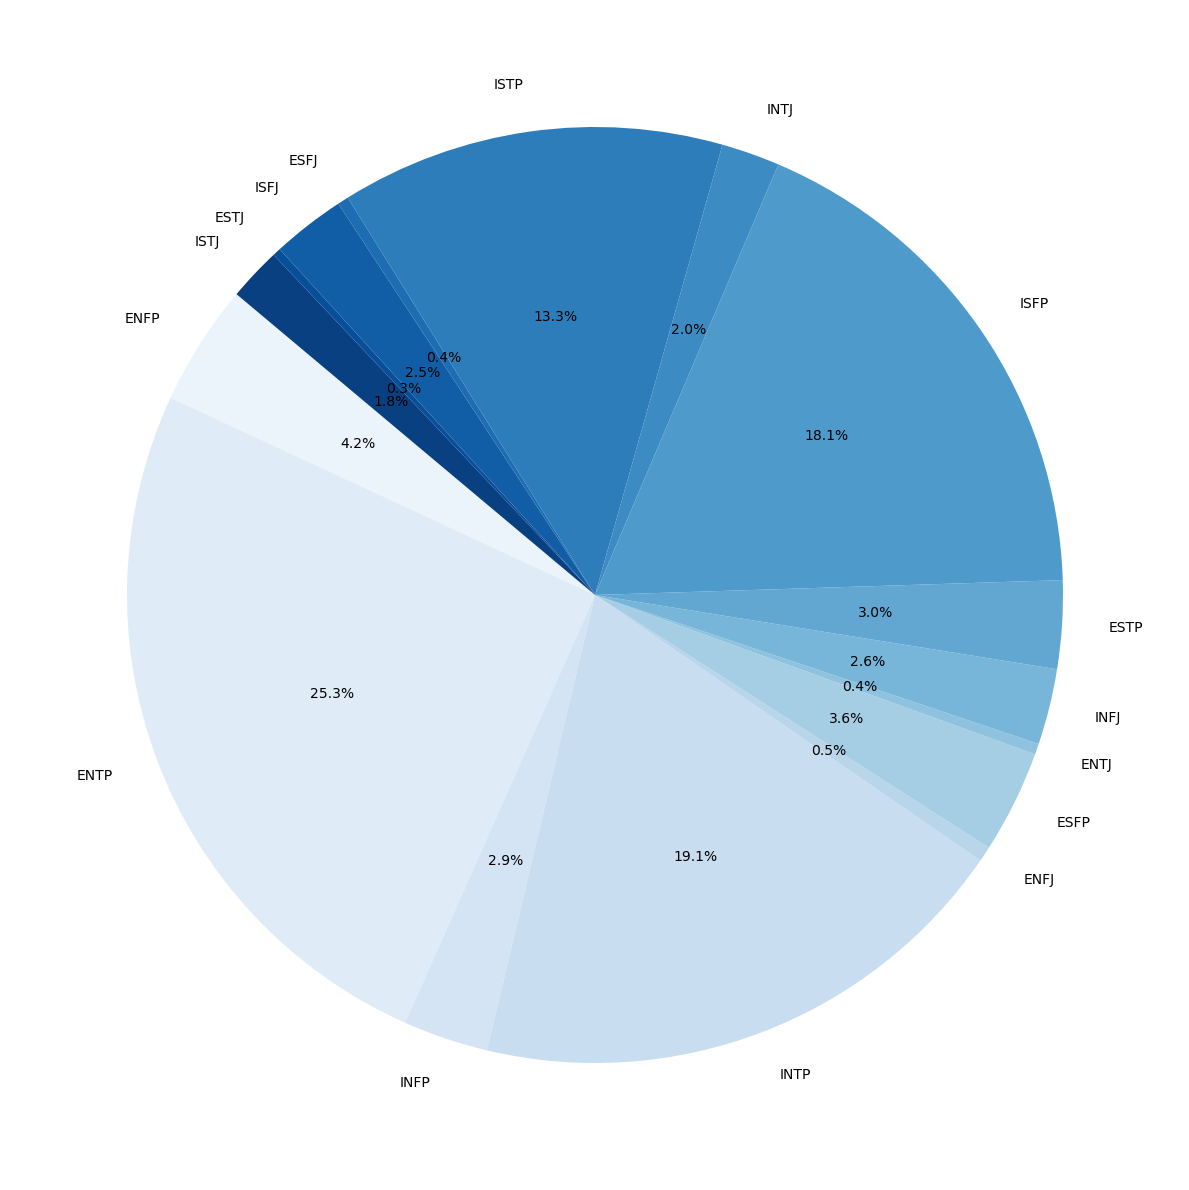

In [42]:
counts = balanced_data['Personality'].value_counts().sort_index()
palette = sns.color_palette("Blues", n_colors=len(counts))
fig = plt.figure(figsize=(18, 12))
plt.pie(counts, autopct='%1.1f%%', startangle=140, colors=palette, labels=["ENFP", "ENTP","INFP","INTP","ENFJ","ESFP","ENTJ","INFJ","ESTP","ISFP","INTJ","ISTP","ESFJ","ISFJ","ESTJ","ISTJ"])
plt.tight_layout()
plt.show()

## use smote to balance Personality(target)

In [43]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x=balanced_data.drop("Personality",inplace=False,axis=1)
y=balanced_data["Personality"]
X_resampled, y_resampled = smote.fit_resample(x, y)
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
balanced_data

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Gender_encoded,Interest_encoded,Personality
0,27.000000,0,5.853920,6.160195,0.805520,4.221421,0,1,ESFP
1,36.000000,1,9.917030,4.755080,5.314690,4.677213,0,2,ENFP
2,27.000000,0,5.249580,5.963290,1.161760,5.873350,0,1,ENFJ
3,24.000000,0,1.626360,5.160906,7.254760,3.825849,0,2,INTP
4,29.000000,1,7.691010,4.198218,9.227870,6.078683,0,0,ENTP
...,...,...,...,...,...,...,...,...,...
298187,32.000000,0,2.740576,6.783963,9.401863,2.677224,1,2,ISTP
298188,26.000000,0,1.928117,6.203385,7.420939,4.170992,1,0,ISTP
298189,25.000000,0,2.331429,6.357868,9.595812,5.045145,0,2,ISTP
298190,27.000000,0,0.748377,6.607338,5.783575,4.719084,1,0,ISTP


In [44]:
balanced_data["Personality"].value_counts()

Personality
ESFP    18637
ENFP    18637
ENFJ    18637
INTP    18637
ENTP    18637
INFP    18637
ISTP    18637
INTJ    18637
INFJ    18637
ISFP    18637
ENTJ    18637
ESFJ    18637
ESTP    18637
ISFJ    18637
ISTJ    18637
ESTJ    18637
Name: count, dtype: int64

## split data to (x,y)

In [45]:
X=balanced_data.drop("Personality",inplace=False,axis=1)
y=balanced_data["Personality"]

## feature selection by use (SelectPercentile)

In [46]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
FeatureSelection = SelectPercentile(score_func = chi2, percentile=80) 
x = FeatureSelection.fit_transform(X, y)

In [47]:
pd.DataFrame(x)

,0,1,2,3,4,5
0,27.000000,0.0,5.853920,6.160195,0.805520,4.221421
1,36.000000,1.0,9.917030,4.755080,5.314690,4.677213
2,27.000000,0.0,5.249580,5.963290,1.161760,5.873350
3,24.000000,0.0,1.626360,5.160906,7.254760,3.825849
4,29.000000,1.0,7.691010,4.198218,9.227870,6.078683
...,...,...,...,...,...,...
298187,32.000000,0.0,2.740576,6.783963,9.401863,2.677224
298188,26.000000,0.0,1.928117,6.203385,7.420939,4.170992
298189,25.000000,0.0,2.331429,6.357868,9.595812,5.045145
298190,27.000000,0.0,0.748377,6.607338,5.783575,4.719084


## split data (train, test)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (238553, 6)
X_test shape is  (59639, 6)
y_train shape is  (238553,)
y_test shape is  (59639,)


## train model(RandomForestClassifier) by Gridsearchcv

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'random_state': [33]
}
RandomForestClassifierModel = RandomForestClassifier()
grid_search = GridSearchCV(estimator=RandomForestClassifierModel, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("best_params", best_params)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

best_params {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200, 'random_state': 33}


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=33)

## evaluation model

In [53]:
from sklearn.metrics import classification_report
y_pred=best_model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :/n ', ClassificationReport )

Classification Report is :/n                precision    recall  f1-score   support

        ENFJ       0.99      0.98      0.99      3674
        ENFP       0.97      0.94      0.95      3729
        ENTJ       0.99      0.99      0.99      3759
        ENTP       0.96      0.93      0.95      3695
        ESFJ       0.99      1.00      1.00      3717
        ESFP       0.98      0.98      0.98      3724
        ESTJ       1.00      1.00      1.00      3789
        ESTP       0.98      0.99      0.98      3701
        INFJ       0.99      0.99      0.99      3794
        INFP       0.95      0.96      0.96      3755
        INTJ       0.99      0.99      0.99      3709
        INTP       0.95      0.95      0.95      3692
        ISFJ       0.99      1.00      1.00      3652
        ISFP       0.98      0.99      0.98      3721
        ISTJ       0.99      1.00      1.00      3764
        ISTP       0.98      0.99      0.99      3764

    accuracy                           0.98     59

## train model(DecisionTreeClassifier) by Gridsearchcv

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier(random_state=33)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifierModel,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1, 
                           verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("best_params", best_params)
print("best_accuracy", best_score)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
best_params {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
best_accuracy 0.9627546094804075


DecisionTreeClassifier(criterion='entropy', random_state=33)

## evaluation model

In [56]:
from sklearn.metrics import classification_report
y_pred=best_model.predict(X_test)
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is :/n ', ClassificationReport )

Classification Report is :/n                precision    recall  f1-score   support

        ENFJ       0.97      0.97      0.97      3674
        ENFP       0.94      0.92      0.93      3729
        ENTJ       0.97      0.98      0.98      3759
        ENTP       0.93      0.93      0.93      3695
        ESFJ       0.99      0.99      0.99      3717
        ESFP       0.97      0.96      0.97      3724
        ESTJ       0.99      1.00      0.99      3789
        ESTP       0.97      0.96      0.97      3701
        INFJ       0.97      0.98      0.98      3794
        INFP       0.93      0.93      0.93      3755
        INTJ       0.97      0.98      0.98      3709
        INTP       0.94      0.93      0.93      3692
        ISFJ       0.99      1.00      0.99      3652
        ISFP       0.97      0.97      0.97      3721
        ISTJ       0.99      1.00      0.99      3764
        ISTP       0.98      0.97      0.98      3764

    accuracy                           0.97     59